# Test Vehicle Tracking


In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
import os
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sdc_functions import *
from sklearn.model_selection import train_test_split

%matplotlib inline


vehicles_folder = '../vehicles'
non_vehicles_folder = '../non-vehicles'

vehicles = glob.glob(vehicles_folder + '/**/*.png', recursive=True)
print('vehicles = ', len(vehicles))
print('image0 = ', vehicles[0])

non_vehicles = glob.glob(non_vehicles_folder + '/**/*.png', recursive=True)
print('non_vehicles = ', len(non_vehicles))
print('image0 = ', non_vehicles[0])

### Subsample 
sample_size = 500
vehicles = np.random.choice(vehicles, sample_size)
non_vehicles = np.random.choice(non_vehicles, sample_size)
print('Sampled to %d images.' % sample_size)

### Parameters
color_space = 'HLS' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 18  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (24, 24) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 700] # Min and max in y to search in slide_window()

t=time.time()
car_features = extract_features(vehicles, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(non_vehicles, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
t2=time.time()

print('Feature extracted :')
print('scaled_X =', len(scaled_X))
print('y =', len(y))
print('feature length = ', len(scaled_X[0]))
print('Time %.2f s' % (t2-t))



'''
# Show Sample Images
plt.subplot(1, 2, 1)
vehicle_img = mpimg.imread(vehicles[np.random.randint(0, len(vehicles))])
plt.imshow(vehicle_img)
plt.subplot(1, 2, 2)
non_vehicle_img = mpimg.imread(non_vehicles[np.random.randint(0, len(non_vehicles))])
plt.imshow(non_vehicle_img)
'''


vehicles =  8792
image0 =  ../vehicles/GTI_Far/image0000.png
non_vehicles =  8968
image0 =  ../non-vehicles/Extras/extra1.png
Sampled to 500 images.
Feature extracted :
scaled_X = 1000
y = 1000
feature length =  12360
Time 6.03 s


'\n# Show Sample Images\nplt.subplot(1, 2, 1)\nvehicle_img = mpimg.imread(vehicles[np.random.randint(0, len(vehicles))])\nplt.imshow(vehicle_img)\nplt.subplot(1, 2, 2)\nnon_vehicle_img = mpimg.imread(non_vehicles[np.random.randint(0, len(non_vehicles))])\nplt.imshow(non_vehicle_img)\n'

In [2]:
### Train SVC

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('X_train =', len(X_train));
print('X_test =', len(X_test));
print('y_train =', len(y_train));
print('y_test =', len(y_test));

# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test)*100, 4))



X_train = 800
X_test = 200
y_train = 800
y_test = 200
0.5 Seconds to train SVC...
Test Accuracy of SVC =  99.0


window_sizes_box = [(160, 160), (128, 128), (96, 96), (64, 64)]
windows len = 30
windows[0] = ((0, 400), (160, 560))
decision = [ 19.33033039]
predict = [ 1.]
win1_features length =  12360
win1_features shape =  (1, 12360)
windows len = 57
windows[0] = ((0, 400), (128, 528))
decision = [ 21.80884569]
predict = [ 1.]
win1_features length =  12360
win1_features shape =  (1, 12360)
windows len = 125
windows[0] = ((0, 400), (96, 496))
decision = [ 11.24850957]
predict = [ 1.]
win1_features length =  12360
win1_features shape =  (1, 12360)
windows len = 312
windows[0] = ((0, 400), (64, 464))
decision = [ 22.81205512]
predict = [ 1.]
win1_features length =  12360
win1_features shape =  (1, 12360)


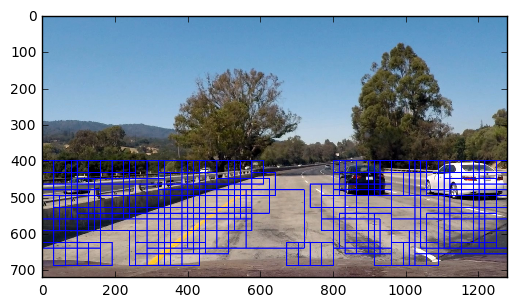

In [6]:
## Search in windows

image = mpimg.imread('test_images/test1.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#image = image.astype(np.float32)/255

window_sizes = [160, 128, 96, 64]
window_sizes_box = [(b, b) for b in window_sizes]
print('window_sizes_box =', window_sizes_box)

all_hot_windows = []
for window_size in window_sizes_box:
    windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=window_size, xy_overlap=(0.5, 0.5))

    print('windows len =', len(windows))
    print('windows[0] =', windows[0])

    win1_image = cv2.resize(image[windows[0][0][1]:windows[0][1][1],windows[0][0][0]:windows[0][1][0]], (64, 64))

    win1_features = extract_features_img(win1_image, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)

    win1_X = win1_features.reshape(1, -1)

    decision = svc.decision_function(win1_X)
    print('decision =', decision)
    predict = svc.predict(win1_X)
    print('predict =', predict)

    print('win1_features length = ', len(win1_features))
    print('win1_features shape = ', win1_features.reshape(1, -1).shape)

    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
    
    all_hot_windows.extend(hot_windows)

window_img = draw_boxes(draw_image, all_hot_windows, color=(0, 0, 255), thick=2)                    

plt.imshow(window_img)





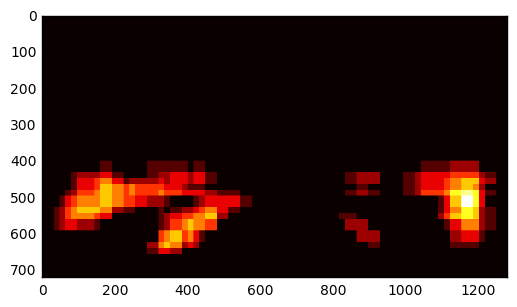

In [10]:

heat = np.zeros_like(image[:,:,0]).astype(np.float)
heat = add_heat(heat, all_hot_windows)
final_map = np.clip(heat - 5, 0, 255)
plt.imshow(final_map, cmap='hot')
